<a href="https://colab.research.google.com/github/rudevico/Gachon-AISTUDY/blob/main/4_Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Accuracy가 1.0인 Model은 항상 완벽할까?
그렇지 않다. 예를 들어 앞선 **3_sampling-bias-and-numpy.ipynb**의 결과로 만들어진 Model은 test_input에 대해서 predict가 test_target과 완벽하게 일치하는 즉, Accuracy가 1.0인 Model이었다.  
하지만 이는 test_input에 대해서만 적용되는 이야기이고, [length, weight] = [25.0, 150.0]인 bream을 Model에 넣었을 때는 smelt라고 잘못 판단하게 된다.  
  
본 예제에서는 새로운 bream에 대해서 잘못 판단하게 된 이유와 이를 해결하는 방법을 다루겠다.  
또한 이전에는 list comprehension으로 만든 2-dim list를 nparray로 변환했지만 이제는 처음부터 python list를 nparray로 변환하는 방법을 사용하여 sample data set을 만들겠다.

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

**tuple**은 **immutable data type**이기 때문에 function에 parameter로 전달할 때 **값이 변경되지 않는다**는 것을 보장할 수 있다. 따라서 parameter로 전달할 때는 tuple을 사용하는 것이 일종의 관례처럼 작용한다.  
* `np.column_stack()`은 입력받은 parameter를 2-dim array로 변환한다.  
* `np.concatenate()`는 입력받은 parameter를 연결한다.  
* `np.ones()`와 `np.zeros()`는 각각 입력받은 parameter 값 만큼 1과 0으로 채워진 array를 생성한다.

In [ ]:
import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)
print(test_target)

(36, 2) (13, 2)
(36,) (13,)
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

앞선 과정에서는 length=25, weight=150인 bream(1)을 smelt(0)으로 잘못 판단한 원인을 sampling bias라고 추측하고, `stratify` parameter를 설정해서 sampling bias 문제를 해결했다.  
그런데 다음 cell을 보면 여전히 Model이 bream(1)을 smelt(0)으로 잘못 판단하고 있음을 확인할 수 있다.

In [ ]:
print(kn.predict([[25, 150]]))

[0.]


# 2. K-NN Algorithm
K Nearest Neighbors Algorithm은 default로 주어진 sample에 대해서 **거리가 가장 가까운 5개의 이웃**을 기준으로 sample의 target값을 예측한다.  
다음 cell과 같이 length=25, weight=150인 datainstance를 train set과 함께 scatter plot으로 그려보자.  
바로 위의 bream이 제일 가까운 이웃인 것은 육안으로도 확인이 가능하지만, 그 다음으로 가까운 이웃들은 좌측의 smelt인지, 우측의 bream인지 구분이 어렵다.

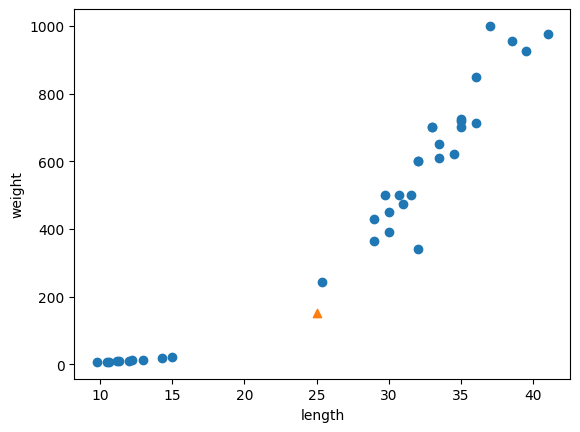

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이때 `KNeighborsClassifier` 클래스가 제공하는 `kneighbors()` 메서드를 사용하면 parameter로 입력한 sample과 가장 가까운 이웃들의 거리와 인덱스를 확인할 수 있다(default=5).

In [ ]:
distances, indexes = kn.kneighbors([[25, 150]])
print(indexes)

[[21 33 19 30  1]]


index만 봐서는 가까운 이웃 sample들이 bream인지, smelt인지 구분이 어려우므로 다음 cell과 같이 scatter plot상에 marker를 다르게 해서 표현해보자.

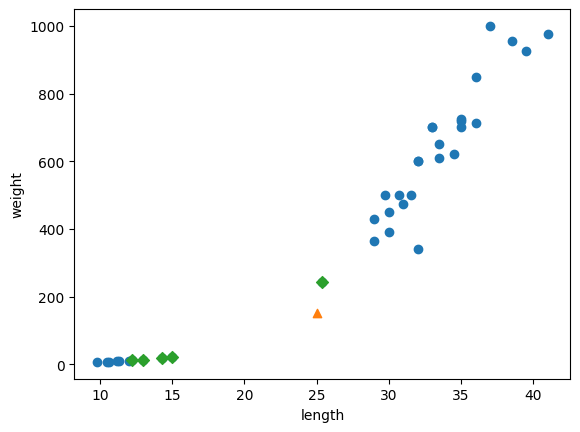

In [ ]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
# line 1에서의 train_input 중에서 line 3과 겹치는 sample이 있다면 line 3의 marker로 overwritting된다.
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이때 scale distortion에 의해 육안상의 거리와 실제 거리 간의 차이가 발생한다.  
이를 `plt.xlim()`을 통해 x axis scale을 조정하여 해결할 수 있다.

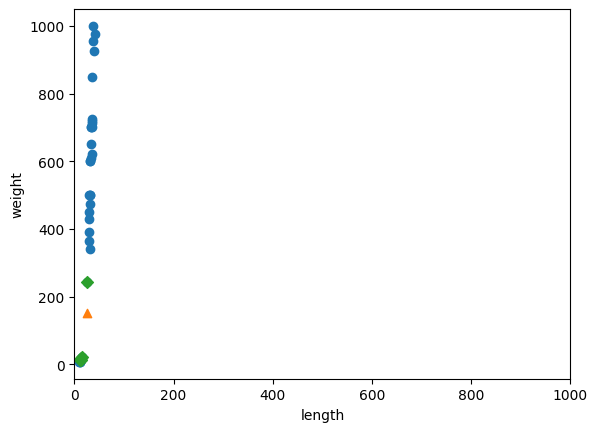

In [ ]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
# line 1에서의 train_input 중에서 line 3과 겹치는 sample이 있다면 line 3의 marker로 overwritting된다.
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이때 x axis scale을 조정해서 scale distortion은 해결했으나, 근본적인 문제는 해결되지 않았다.  
> K-NN Algorithm에서 distance 기준으로 nearest neighbors를 정할 때 length와 weight의 단위 차이 때문에 length 차이는 사실상 distance 계산에 영향을 미치지 못한다.  

이를 해결하기 위해서는 **data preprocessing; 데이터 전처리**가 필요하다.  
본 예제에서는 가장 널리 사용하는 data preprocessing 방법 중 하나인 **standard score; 표준점수**, 그 중에서도 가장 기본적인 **Z-Score**를 사용하겠다.  
$ Z =  \frac{X- \mu }{  \sigma } $

In [ ]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

train_scaled = (train_input - mean) / std
print(train_scaled)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]
[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825992]

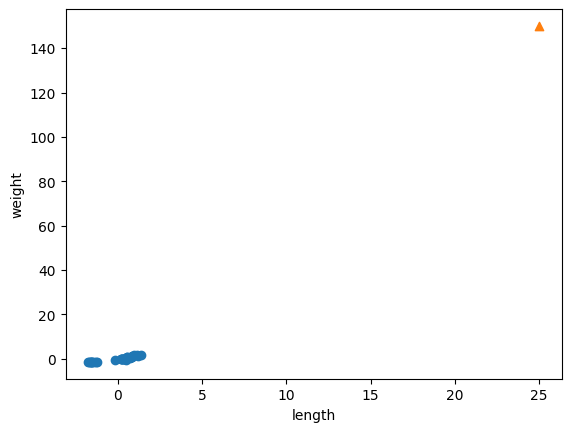

In [ ]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

당연하게도 train set에 대해서는 Z-Score로 standardization을 수행했지만, [25, 150]에 대해서는 하지 않았기 때문에 scatter plot상에 동떨어진 곳에 찍힘을 알 수 있다.

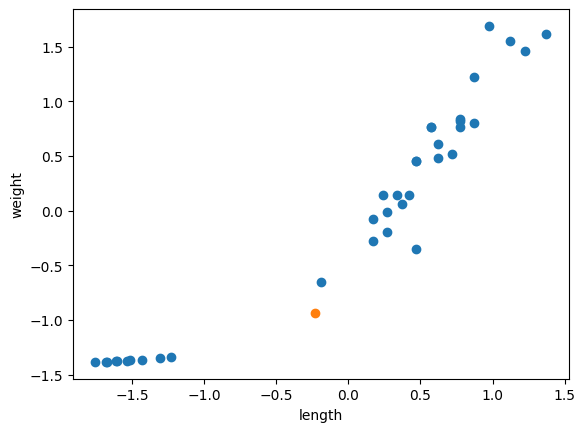

In [ ]:
new_bream = ([25, 150] - mean) / std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new_bream[0], new_bream[1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이제 train set을 사용하여 fitting을 하고, Model을 test해보자.  
이때 test set도 마찬가지로 Z-Score로의 standardization을 해야함에 유의하자.

In [ ]:
test_scaled = (test_input - mean) / std

kn.fit(train_scaled, train_target)
kn.score(test_scaled, test_target)

1.0

이제 [25, 150](정확히는 이를 Z-Score로 환산한 값)에 대해서 정상적으로 bream(1)이라고 판단하는 것을 확인할 수 있다.

In [ ]:
print(kn.predict([new_bream]))

[1.]
